# Speech to text / Automatic speech recognition

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/audiospeech_to_text.ipynb)

This tutorial demonstrates how to use the `transcribe_audios` function to convert audio files into text transcriptions efficiently.

## Setup
First, let's import the necessary libraries and the function we'll be using.

In [1]:
from senselab.audio.data_structures import Audio
from senselab.audio.tasks.preprocessing import downmix_audios_to_mono, resample_audios
from senselab.audio.tasks.speech_to_text import transcribe_audios
from senselab.audio.tasks.speech_to_text_evaluation import calculate_wer
from senselab.utils.data_structures import DeviceType, HFModel
from senselab.utils.tasks.plotting import plot_transcript

## Specifying the ASR model and the preferred device
Let's initialize the model we want to use (remember to specify both the ```path_or_uri``` and the ```revision``` for reproducibility purposes) and the device we prefer.

In [2]:
model = HFModel(path_or_uri="openai/whisper-tiny", revision="main")
device = DeviceType.CPU

## Loading Audio Files
Now let's load and process the audio files we want to transcribe using senselab's built-in tools.

In [3]:
audio1 = Audio.from_filepath("../../src/tests/data_for_testing/audio_48khz_mono_16bits.wav")
audio2 = Audio.from_filepath("../../src/tests/data_for_testing/audio_48khz_stereo_16bits.wav")

## Preprocessing
Let's preprocess the audio data to make it suitable with the ASR model characteristics that we can find in the model card in the HuggingFace Hub.

In [4]:
# Downmix to mono
audio2 = downmix_audios_to_mono([audio2])[0]

# Resample both audios to 16kHz
audios = resample_audios([audio1, audio2], 16000)

## Transcription
Let's finally transcribe the audio clips. 

Note: If you know the language spoken in your clips, you can specify that using the ```language``` parameter. For more details, see the [**dedicated documentation**](https://sensein.group/senselab/senselab/audio/tasks/speech_to_text.html).

In [5]:
transcripts = transcribe_audios(audios=audios, model=model, device=device)

2024-07-25 13:58:18,602 - senselab - INFO - Time taken for initialize the hugging face ASR pipeline: 0.23 seconds
/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-UNCffeRf-py3.10/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:483: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
The a

Here is the result of the analysis.

In [6]:
transcripts

[ScriptLine(text='This is Peter. This is Johnny. Kenny. And Joe. We just wanted to take a minute to thank you.', speaker=None, start=0.08, end=4.9, chunks=[ScriptLine(text='This', speaker=None, start=0.08, end=0.3, chunks=None), ScriptLine(text='is', speaker=None, start=0.3, end=0.48, chunks=None), ScriptLine(text='Peter.', speaker=None, start=0.48, end=1.1, chunks=None), ScriptLine(text='This', speaker=None, start=1.1, end=1.18, chunks=None), ScriptLine(text='is', speaker=None, start=1.18, end=1.4, chunks=None), ScriptLine(text='Johnny.', speaker=None, start=1.4, end=2.24, chunks=None), ScriptLine(text='Kenny.', speaker=None, start=2.24, end=2.44, chunks=None), ScriptLine(text='And', speaker=None, start=2.44, end=2.6, chunks=None), ScriptLine(text='Joe.', speaker=None, start=2.6, end=3.5, chunks=None), ScriptLine(text='We', speaker=None, start=3.5, end=3.52, chunks=None), ScriptLine(text='just', speaker=None, start=3.52, end=3.78, chunks=None), ScriptLine(text='wanted', speaker=None, 

## Transcript visualization
Let's visualize the transcript better.

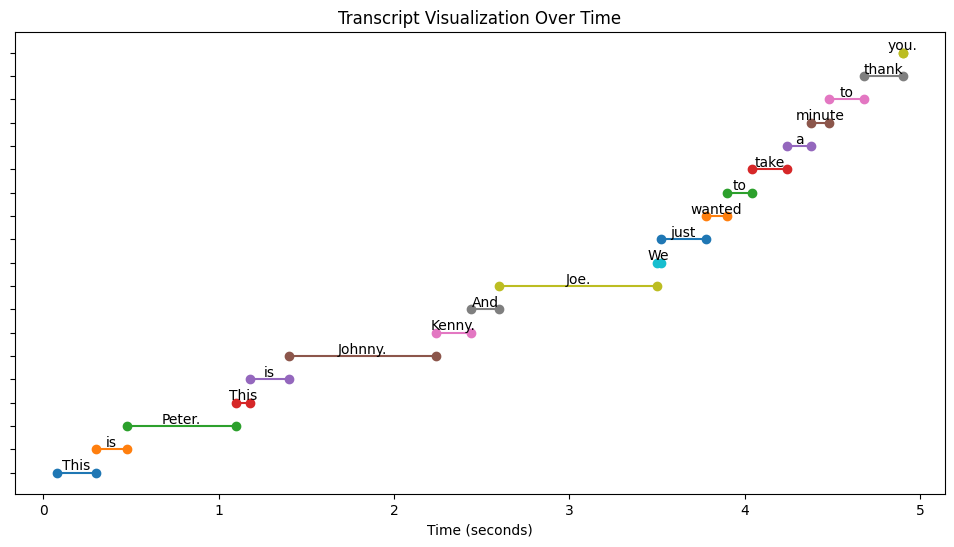

In [7]:
plot_transcript(transcripts[0])

## Transcript evaluation
To compare the performance of a model against the ground truth using the Senselab functionalities, you can compute the word error rate (WER). The WER evaluates the accuracy of the model by considering the number of insertions, deletions, and substitutions, normalized by the total number of words in the reference string.

In [9]:
ground_truth = "This is Peter. This is Johnny. Kenny. And Joe. We just wanted to take a minute to thank you."

wer = calculate_wer(reference=ground_truth, hypothesis=transcripts[0].text)
print(f"The Word Error Rate (WER) is: {wer}")

The Word Error Rate (WER) is: 0.0


Check the [**documentation**](https://sensein.group/senselab/senselab/audio/tasks/speech_to_text_evaluation.html) for more details.